In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [14]:
start = time.time()
chunk = pd.read_csv('data/clients.csv', chunksize=10000, on_bad_lines='skip')
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")
client_df = pd.concat(chunk)

client_df.head()

Read csv with chunks:  0.009962320327758789 sec


,Id,StateAbbr,ClientUno,County,StateName,PostalCode,EthnicIdentity,Age,Gender,MaritalStatus,Veteran,Imprisoned,NumberInHousehold,AnnualIncome,AllowedIncome,CheckingBalance,SavingsBalance,InvestmentsBalance,CreatedUtc
0,1,MS,B731DA7A-A97A-4A2E-BF11-0A126A05AF70,Washington,Mississippi,73179.0,NaN,NaN,NaN,NaN,NaN,No,3.0,26000.0,37190.0,300.0,NaN,NaN,2016-08-25 15:15:37
1,2,MS,8101DB7C-0CC8-4DE9-9E87-71137269AAD5,Harrison,Mississippi,39560.0,Caucasian,NaN,Male,Divorced or Widowed,NaN,No,2.0,52.0,25390.0,1.0,1.0,NaN,2016-08-26 00:55:17
2,3,GA,DD5F1EFC-8298-457F-BC09-CABBEB57A697,Barrow,Georgia,30157.0,Latino or Hispanic,55.0,Male,Single,NaN,No,5.0,3000.0,60790.0,NaN,NaN,NaN,2016-10-12 14:37:06
3,4,TX,21DC9E3D-D0AA-4B85-88BB-428F5BCF7F13,Lubbock,Texas,79416.0,Other,61.0,Female,Married / remarried,No,No,4.0,15600.0,48990.0,100.0,NaN,NaN,2017-01-01 19:57:07
4,5,ID,3782D4F9-9B16-4BC8-ADA3-F85CEE200630,Boise,Idaho,83705.0,Caucasian,65.0,Male,Single,No,No,1.0,15000.0,13590.0,580.0,25.0,NaN,2017-02-23 00:03:27


In [15]:
states = client_df["StateAbbr"]
state_freq = states.value_counts()
state_freq.values

array([36050, 31458, 30525, 23036, 18991, 18330, 15902, 14412, 13986,
       11614, 10267,  9664,  9580,  9473,  9168,  6001,  5349,  5188,
        4704,  4693,  4561,  4243,  4222,  3277,  3099,  2697,  2558,
        2206,  2151,  2091,  1624,  1567,  1538,  1503,  1446,  1441,
        1054,   881,   875,     1], dtype=int64)

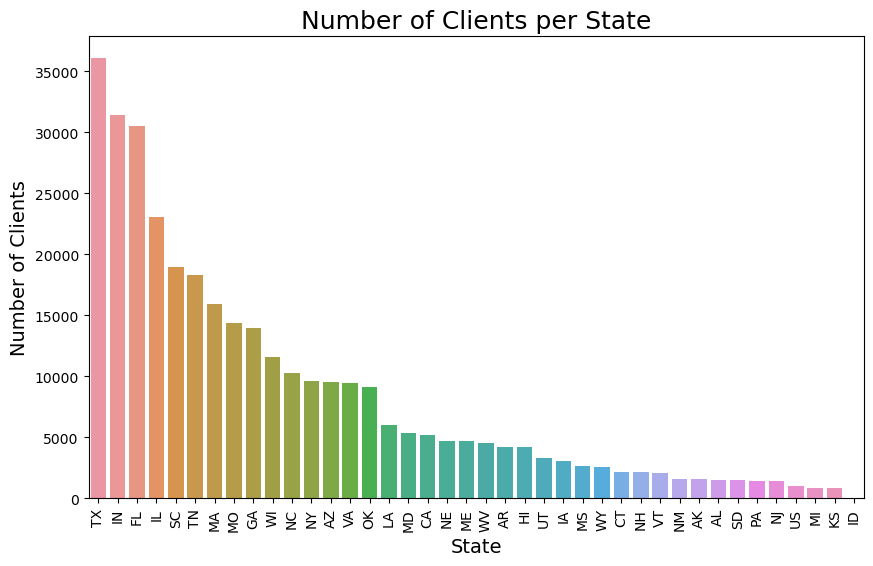

In [27]:
plt.figure(figsize = (10,6))
sns.barplot(x = state_freq.index, y = state_freq.values)
plt.xticks(rotation=90)
plt.xlabel("State", size = 14)
plt.ylabel("Number of Clients", size = 14)
plt.title("Number of Clients per State", size = 18)
plt.savefig('figures/clientsperstate.png')
plt.show()

In [29]:
ethnic_identity = client_df["EthnicIdentity"]
ethnic_freq = ethnic_identity.value_counts()

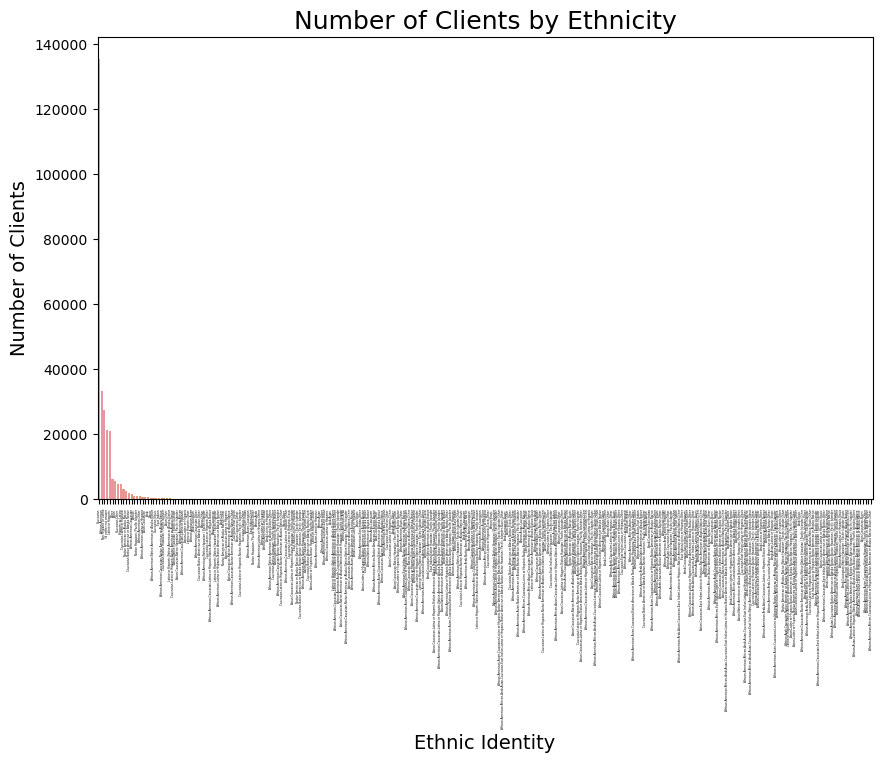

In [31]:
plt.figure(figsize = (10,6))
sns.barplot(x = ethnic_freq.index, y = ethnic_freq.values)
plt.xticks(rotation=90, size = 2)
plt.xlabel("Ethnic Identity", size = 14)
plt.ylabel("Number of Clients", size = 14)
plt.title("Number of Clients by Ethnicity", size = 18)
plt.savefig('figures/clientethnicity.png')
plt.show()

In [36]:
gender = client_df["Gender"]
gender_freq = gender.value_counts()
gender_freq

Female                              185433
Male                                 87517
I'd rather not answer                 6257
Other                                  796
Non-Conforming                         159
Female,Non-Conforming                   24
Female,Male                             17
Male,Non-Conforming                     12
Non-Conforming,Other                     5
Female,Other                             4
Male,Other                               2
Female,Male,Non-Conforming,Other         1
Name: Gender, dtype: int64

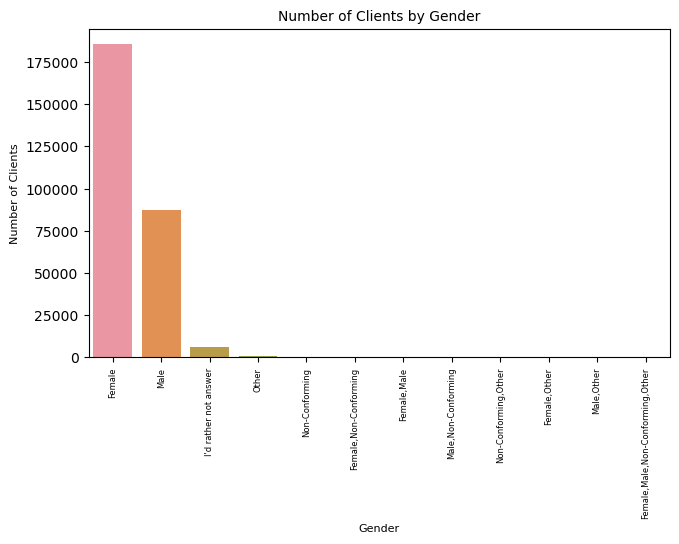

In [63]:
plt.figure(figsize = (7.5,4.5))
sns.barplot(x = gender_freq.index, y = gender_freq.values)
plt.xticks(rotation=90, size = 6)
plt.xlabel("Gender", size = 8)
plt.ylabel("Number of Clients", size = 8)
plt.title("Number of Clients by Gender", size = 10)
plt.savefig('figures/clientgender.png')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [53]:
annual_incomes = client_df["AnnualIncome"]
annual_incomes
income_cats = ["Under 15,000", "15,000 to 24,999", "25,000 to 34,999", "35,000 to 49,999", "50,000 to 74,999", "75,000 to 99,999"
              , "100,000 to 149,999", "150,000 to 199,999", "200,000 and over"]
cat_nums = len(income_cats)
income_freq = [0] * cat_nums

for item in annual_incomes:
    if (item < 15000):
        income_freq[0] += 1
        continue
    
    elif (item < 25000):
        income_freq[1] += 1
        continue
    
    elif (item < 35000):
        income_freq[2] += 1
        continue
    
    elif (item < 50000):
        income_freq[3] += 1
        continue
    
    elif (item < 75000):
        income_freq[4] += 1
        continue
    
    elif (item < 100000):
        income_freq[5] += 1
        continue
    
    elif (item < 150000):
        income_freq[6] += 1
        continue
    
    elif (item < 200000):
        income_freq[7] += 1
        continue
    
    else:
        income_freq[8] += 1
        continue

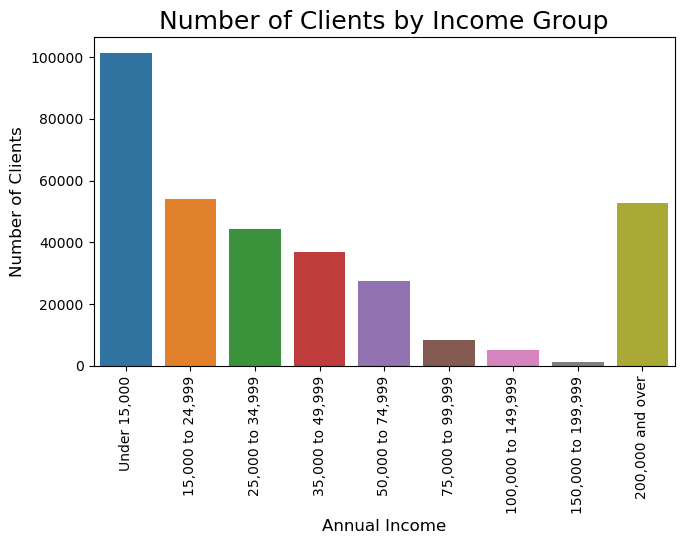

In [64]:
plt.figure(figsize = (7.5,4.5))
sns.barplot(x = income_cats, y = income_freq)
plt.xticks(rotation = 90)
plt.xlabel("Annual Income", size = 12)
plt.ylabel("Number of Clients", size = 12)
plt.title("Number of Clients by Income Group", size = 18)
plt.savefig('figures/annualincomedistribution.png')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [61]:
in_prison = client_df["Imprisoned"]
in_prison.value_counts()

No     279503
Yes      1099
Name: Imprisoned, dtype: int64